In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils.np_utils import to_categorical
%matplotlib inline

In [2]:
train_dir=pd.read_csv("../input/digit-recognizer/train.csv")
test_dir=pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
train_dir.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train=train_dir.drop(labels = ["label"],axis = 1)
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train=train_dir['label']
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

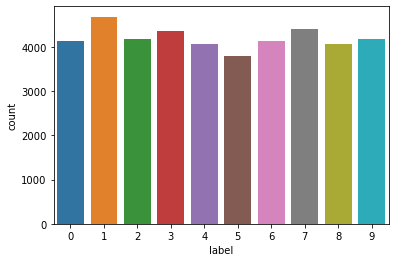

In [6]:
sns.countplot(y_train,data=train_dir)

In [7]:
y_train= to_categorical(y_train, num_classes = 10)


# NORMALIZATION

In [8]:
X_train = X_train / 255.0
test_dir = test_dir / 255.0


In [9]:
#RESHAPING
X_train = X_train.values.reshape(-1, 28 , 28, 1)
test_dir = test_dir.values.reshape(-1, 28 , 28, 1)

In [10]:
from sklearn.model_selection import train_test_split

X, X_val, y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=7)

In [11]:
from tensorflow.keras import regularizers
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1),padding='Same'),
                                           tf.keras.layers.MaxPooling2D(2,2),
                                           tf.keras.layers.Dropout(0.2),
                                           tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='Same'),
                                           tf.keras.layers.MaxPooling2D(2,2),
                                           tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
                                           tf.keras.layers.MaxPooling2D(2,2),
                                           tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='Same'),
                                           tf.keras.layers.MaxPooling2D(2,2),
                                           tf.keras.layers.Flatten(),
                                           tf.keras.layers.Dense(512,activation='relu'),
                                           tf.keras.layers.Dropout(0.3),
                                           tf.keras.layers.Dense(10,activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

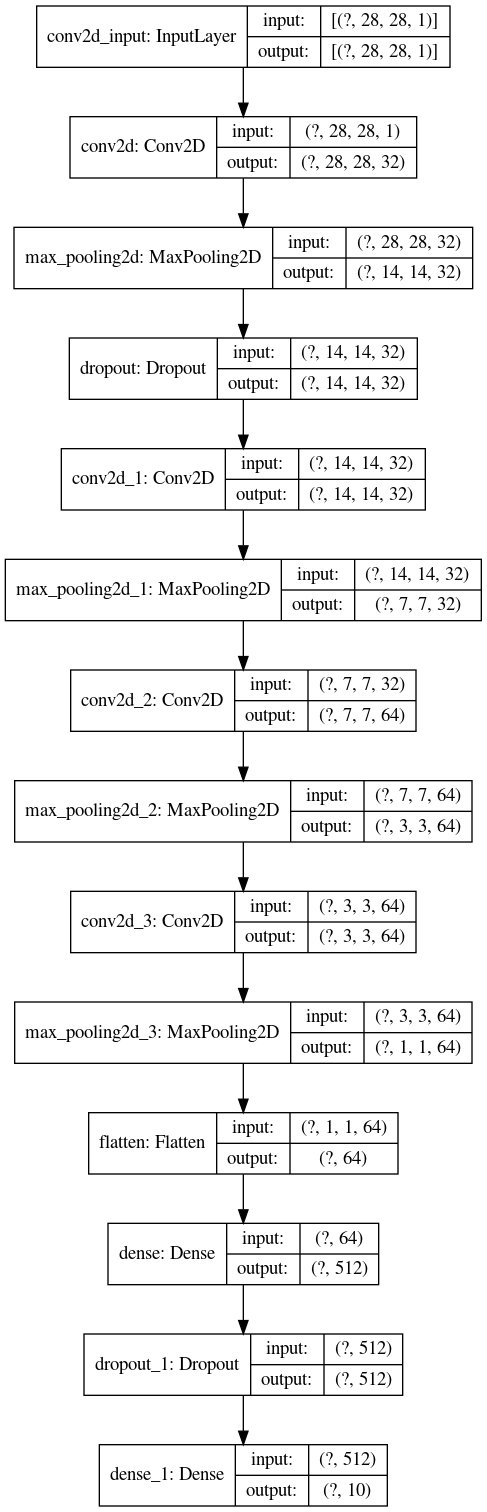

In [12]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [13]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
class mycallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if(logs.get('accuracy')>0.99):
            self.model.stop_training=True
            
callbacks=mycallbacks()

history=model.fit(X,y,validation_data=(X_val,y_val),epochs=30,verbose=1,callbacks=[callbacks])

Epoch 1/30
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2787 - accuracy: 0.9076 - val_loss: 0.1203 - val_accuracy: 0.9604
Epoch 2/30
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0734 - accuracy: 0.9780 - val_loss: 0.0602 - val_accuracy: 0.9830
Epoch 3/30
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0522 - accuracy: 0.9839 - val_loss: 0.1010 - val_accuracy: 0.9776
Epoch 4/30
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.0642 - val_accuracy: 0.9869
Epoch 5/30
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0396 - accuracy: 0.9883 - val_loss: 0.0947 - val_accuracy: 0.9837
Epoch 6/30
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0359 - accuracy: 0.9909 - val_loss: 0.0664 - val_accuracy: 0.9865


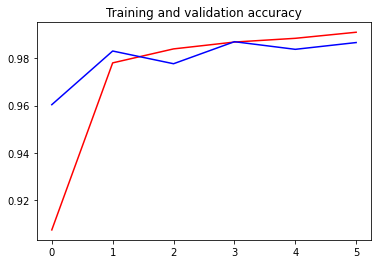

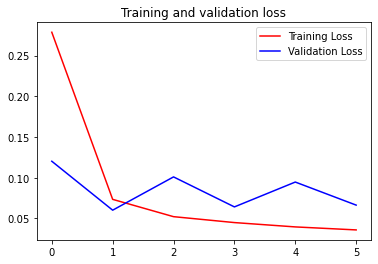

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
results =[]
for index in range(28000):
    img = test_dir[index].reshape(1, 28, 28, 1)
    pred = np.argmax(model.predict(img))
    results.append(pred)

In [ ]:
submission = pd.DataFrame()
submission['ImageId'] = [i for i in range(1, 28001)]
submission['Label'] = results

submission.to_csv('./DR.csv', index=False)
